In [130]:
import math
import random
import scipy
import statistics
import numpy as np
import scipy.stats
from scipy.special import comb
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import plotly.graph_objects as go
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [131]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks SQC/CSV/Chap 13b Table.csv')
df

,Unnamed: 0,a,b,c,d,Results
0,0,-1,-1,-1,-1,7.037
1,1,1,-1,-1,-1,14.707
2,2,-1,1,-1,-1,11.635
3,3,1,1,-1,-1,17.273
4,4,-1,-1,1,-1,10.403
5,5,1,-1,1,-1,4.368
6,6,-1,1,1,-1,9.360
7,7,1,1,1,-1,13.440
8,8,-1,-1,-1,1,8.561
9,9,1,-1,-1,1,16.867


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  32 non-null     int64  
 1   a           32 non-null     int64  
 2   b           32 non-null     int64  
 3   c           32 non-null     int64  
 4   d           32 non-null     int64  
 5   Results     32 non-null     float64
dtypes: float64(1), int64(5)
memory usage: 1.6 KB


In [133]:
Xmain=df[['a', 'b', 'c', 'd']].to_numpy()
Xmain

array([[-1, -1, -1, -1],
       [ 1, -1, -1, -1],
       [-1,  1, -1, -1],
       [ 1,  1, -1, -1],
       [-1, -1,  1, -1],
       [ 1, -1,  1, -1],
       [-1,  1,  1, -1],
       [ 1,  1,  1, -1],
       [-1, -1, -1,  1],
       [ 1, -1, -1,  1],
       [-1,  1, -1,  1],
       [ 1,  1, -1,  1],
       [-1, -1,  1,  1],
       [ 1, -1,  1,  1],
       [-1,  1,  1,  1],
       [ 1,  1,  1,  1],
       [-1, -1, -1, -1],
       [ 1, -1, -1, -1],
       [-1,  1, -1, -1],
       [ 1,  1, -1, -1],
       [-1, -1,  1, -1],
       [ 1, -1,  1, -1],
       [-1,  1,  1, -1],
       [ 1,  1,  1, -1],
       [-1, -1, -1,  1],
       [ 1, -1, -1,  1],
       [-1,  1, -1,  1],
       [ 1,  1, -1,  1],
       [-1, -1,  1,  1],
       [ 1, -1,  1,  1],
       [-1,  1,  1,  1],
       [ 1,  1,  1,  1]])

In [134]:
abcd=df['a'] * df['b'] *df['c'] * df['d']
abcd

0     1
1    -1
2    -1
3     1
4    -1
5     1
6     1
7    -1
8    -1
9     1
10    1
11   -1
12    1
13   -1
14   -1
15    1
16    1
17   -1
18   -1
19    1
20   -1
21    1
22    1
23   -1
24   -1
25    1
26    1
27   -1
28    1
29   -1
30   -1
31    1
dtype: int64

In [135]:
poly= PolynomialFeatures(degree=3, interaction_only=True)
table=pd.DataFrame(poly.fit_transform(Xmain), columns=['I', 'a', 'b', 'c', 'd','ab', 'ac', 'ad', 'bc', 'bd', 'cd', 'abc', 'abd', 'acd','bcd'])
table['abcd']=abcd
table


,I,a,b,c,d,ab,ac,ad,bc,bd,cd,abc,abd,acd,bcd,abcd
0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1
1,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1
2,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1
3,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1
4,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,-1
5,1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,1
6,1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,1
7,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1
8,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1
9,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1


In [136]:
X=table[['a', 'b', 'c', 'd','ab', 'ac', 'ad', 'bc', 'bd', 'cd', 'abc', 'abd', 'acd','bcd','abcd']]
Y=df[['Results']]
regr=LinearRegression()
regr.fit(X,Y)
Yhat=regr.predict(X)
Y=Y.to_numpy()
eij=Y-Yhat
print(eij)

[[ 0.3305]
 [-0.256 ]
 [-0.227 ]
 [-0.271 ]
 [ 0.126 ]
 [ 0.135 ]
 [ 0.0535]
 [ 0.2585]
 [-0.195 ]
 [-0.0925]
 [ 0.109 ]
 [ 0.0925]
 [-0.2455]
 [ 0.1105]
 [ 0.1275]
 [ 0.3   ]
 [-0.3305]
 [ 0.256 ]
 [ 0.227 ]
 [ 0.271 ]
 [-0.126 ]
 [-0.135 ]
 [-0.0535]
 [-0.2585]
 [ 0.195 ]
 [ 0.0925]
 [-0.109 ]
 [-0.0925]
 [ 0.2455]
 [-0.1105]
 [-0.1275]
 [-0.3   ]]


In [137]:
X=table[['I', 'a', 'b', 'c', 'd','ab', 'ac', 'ad', 'bc', 'bd', 'cd', 'abc', 'abd', 'acd','bcd','abcd']]
model = sm.OLS(Y, X)
res=model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     469.0
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           3.08e-18
Time:                        01:33:37   Log-Likelihood:                 5.8657
No. Observations:                  32   AIC:                             20.27
Df Residuals:                      16   BIC:                             43.72
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I             11.9881      0.050    238.042      0.0

13.19a All factors are significant except: bd, acd, bcd, abcd, because t is less than p(.05).

In [138]:
model = ols('Results ~ C(a) + C(b) + C(c) + C(d) + C(a):C(b) + C(a):C(c) + C(a):C(d) + C(b):C(c) + C(b):C(d) + C(c):C(d) + C(a):C(b):C(c) + C(a):C(b):C(c):C(d)', data = df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(a),72.908850,1.0,898.338923,1.740225e-15
C(b),126.460656,1.0,1558.172011,2.247046e-17
C(c),103.464112,1.0,1274.822456,1.100354e-16
C(d),30.662280,1.0,377.802146,1.485334e-12
C(a):C(b),29.926716,1.0,368.738965,1.790240e-12
C(a):C(c),128.496480,1.0,1583.256213,1.979949e-17
C(a):C(d),0.046818,1.0,0.576863,4.585895e-01
C(b):C(c),0.073728,1.0,0.908432,3.547091e-01
C(b):C(d),0.017860,1.0,0.220066,6.453180e-01
C(c):C(d),0.047278,1.0,0.582533,4.564284e-01


13.19b Same conclusion as 13.19a

In [139]:
res.resid

0     0.3305
1    -0.2560
2    -0.2270
3    -0.2710
4     0.1260
5     0.1350
6     0.0535
7     0.2585
8    -0.1950
9    -0.0925
10    0.1090
11    0.0925
12   -0.2455
13    0.1105
14    0.1275
15    0.3000
16   -0.3305
17    0.2560
18    0.2270
19    0.2710
20   -0.1260
21   -0.1350
22   -0.0535
23   -0.2585
24    0.1950
25    0.0925
26   -0.1090
27   -0.0925
28    0.2455
29   -0.1105
30   -0.1275
31   -0.3000
dtype: float64

In [140]:
X=table[['a','b','c','d','ab','ac','abc']]
Y=df[['Results']]
regr2=LinearRegression()
regr2.fit(X,Y)
Yhat2=regr2.predict(X)
X2=table[['I','a','b','c','d','ab','ac','abc']]
model2 = sm.OLS(Y, X2)
res2=model2.fit()
print(res2.summary())
df['resdiual']=res

                            OLS Regression Results                            
Dep. Variable:                Results   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1242.
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           3.97e-29
Time:                        01:33:37   Log-Likelihood:                 2.7701
No. Observations:                  32   AIC:                             10.46
Df Residuals:                      24   BIC:                             22.19
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I             11.9881      0.045    264.659      0.0

13.19c regression results is stated above.

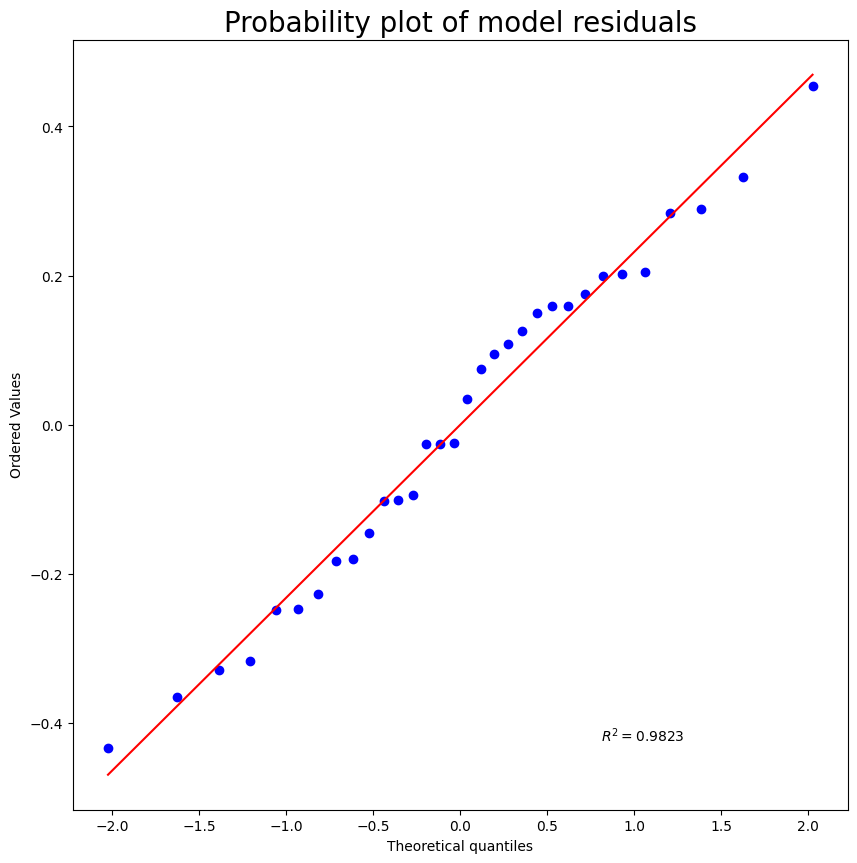

In [141]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)
normality_plot, stat = stats.probplot(res2.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residuals", fontsize= 20)
ax.set
plt.show()

13.19d The normality plot is very accurate and is a good representation of the data.

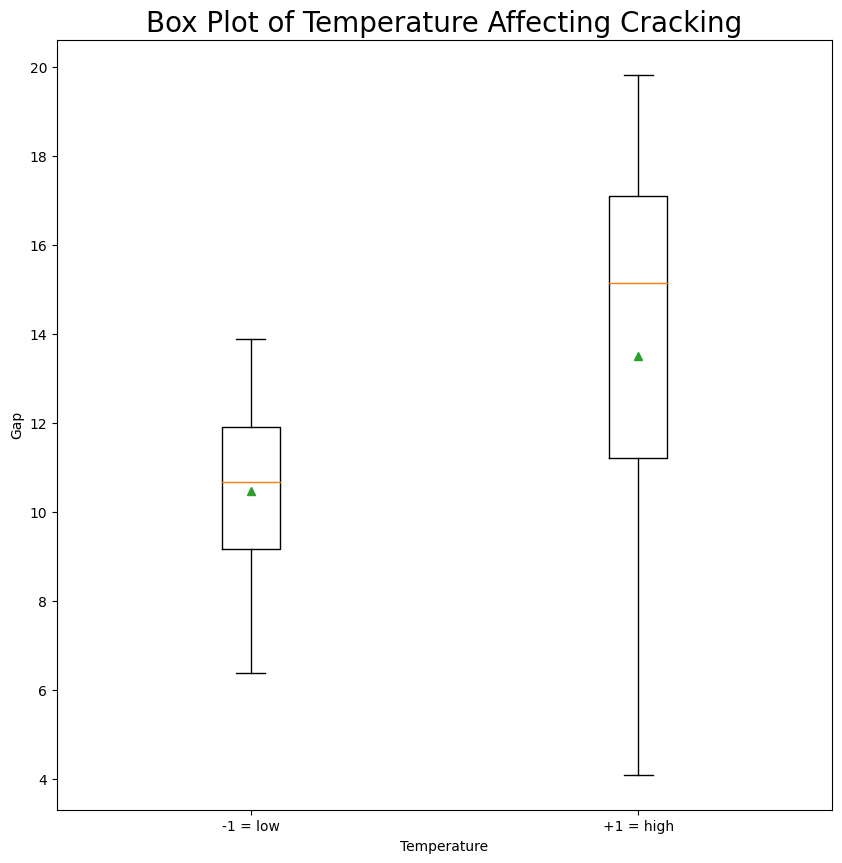

In [142]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)
ax.set_title("Box Plot of Temperature Affecting Cracking", fontsize= 20)
ax.set
boxdata= [df['Results'][df['a'] == -1],df['Results'][df['a'] == 1]]
ax.boxplot(boxdata,labels= ['-1 = low', '+1 = high'],showmeans= True)
plt.xlabel("Temperature")
plt.ylabel("Gap")
plt.show()

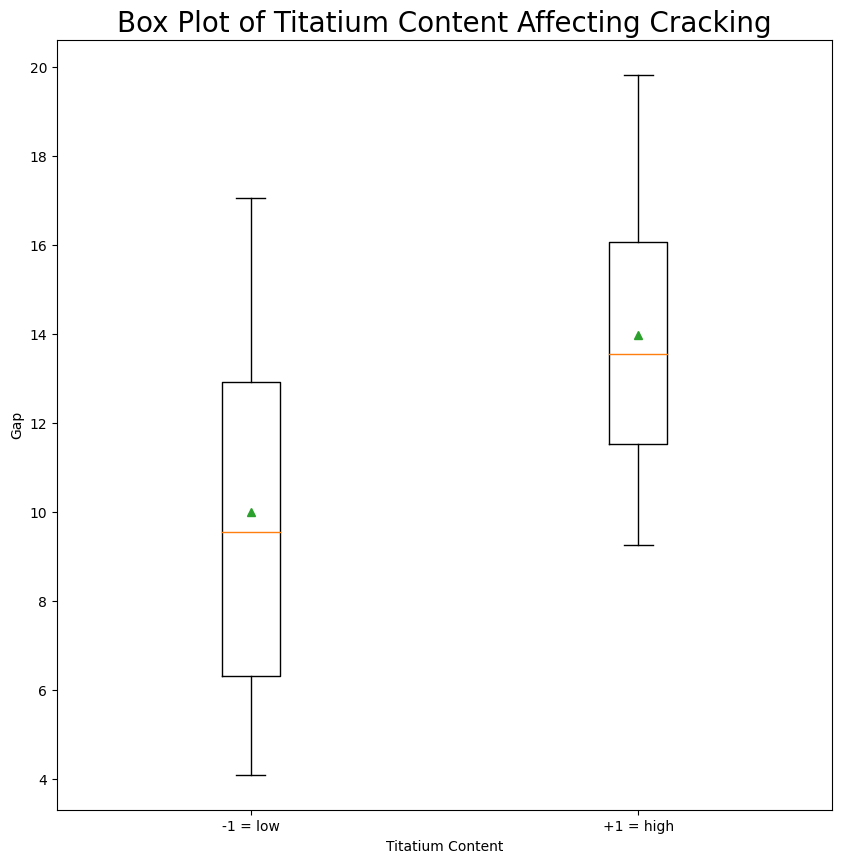

In [143]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)
ax.set_title("Box Plot of Titatium Content Affecting Cracking", fontsize= 20)
ax.set
boxdata= [df['Results'][df['b'] == -1],df['Results'][df['b'] == 1]]
ax.boxplot(boxdata,labels= ['-1 = low', '+1 = high'],showmeans= True)
plt.xlabel("Titatium Content")
plt.ylabel("Gap")
plt.show()

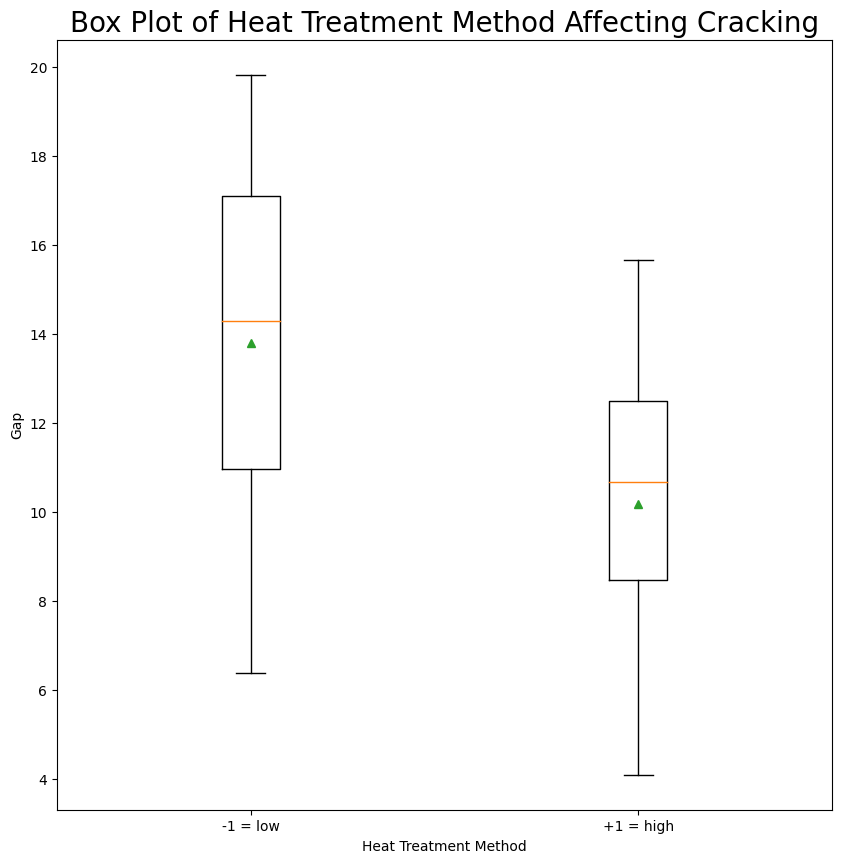

In [144]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)
ax.set_title("Box Plot of Heat Treatment Method Affecting Cracking", fontsize= 20)
ax.set
boxdata= [df['Results'][df['c'] == -1],df['Results'][df['c'] == 1]]
ax.boxplot(boxdata,labels= ['-1 = low', '+1 = high'],showmeans= True)
plt.xlabel("Heat Treatment Method")
plt.ylabel("Gap")
plt.show()

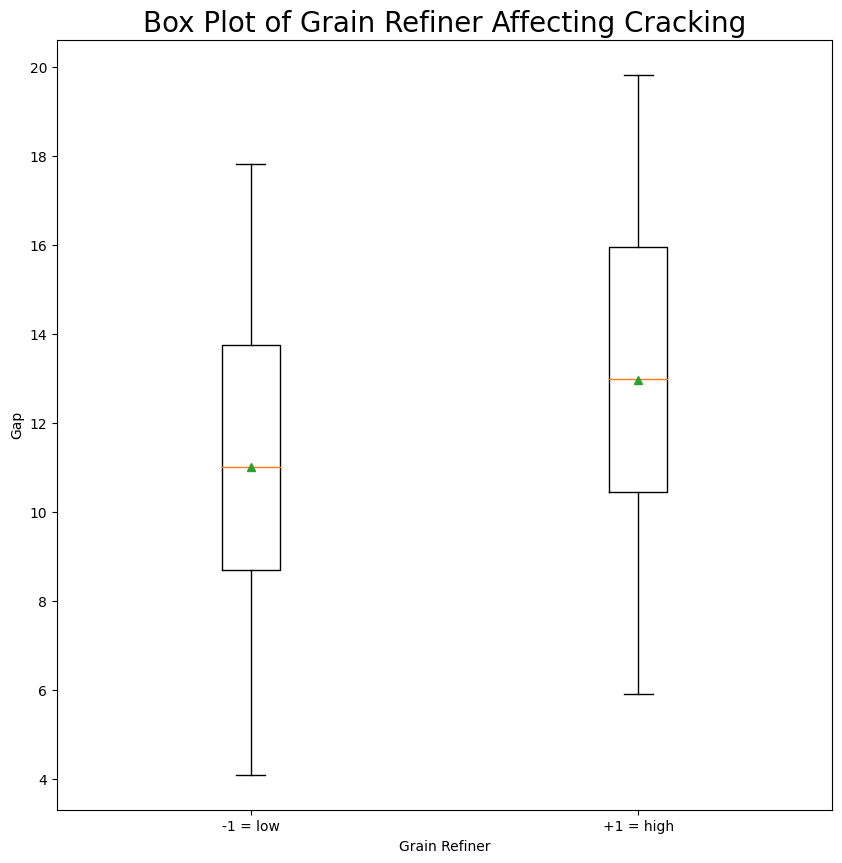

In [145]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)
ax.set_title("Box Plot of Grain Refiner Affecting Cracking", fontsize= 20)
ax.set
boxdata= [df['Results'][df['d'] == -1],df['Results'][df['d'] == 1]]
ax.boxplot(boxdata,labels= ['-1 = low', '+1 = high'],showmeans= True)
plt.xlabel("Grain Refiner")
plt.ylabel("Gap")
plt.show()

13.19e after looking at the boxplots we can see that the factors do affect the cracking variability.

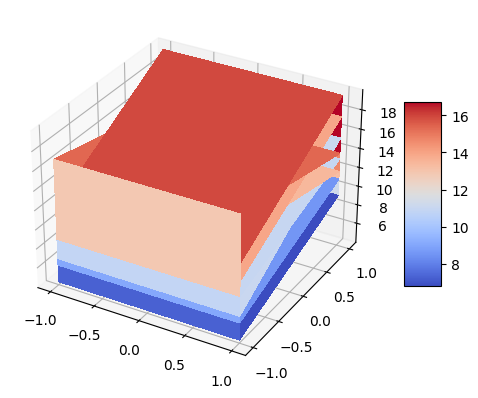

In [146]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
x1=df['a']
x2=df['b']
x1, x2 = np.meshgrid(x1, x2)
surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

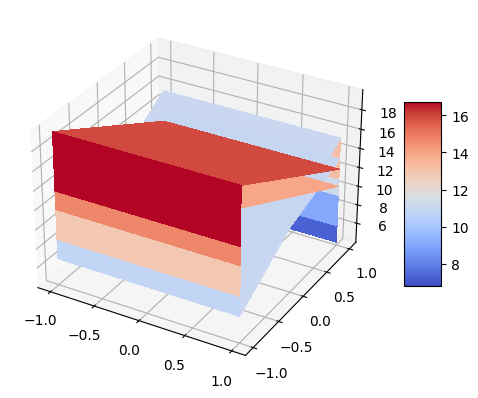

In [147]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
x1=df['a']
x2=df['c']
x1, x2 = np.meshgrid(x1, x2)
surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

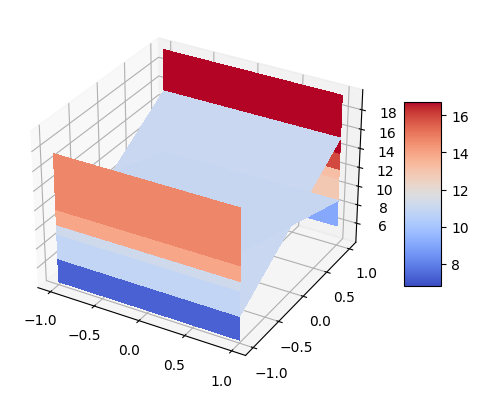

In [148]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
x1=df['a']
x2=df['d']
x1, x2 = np.meshgrid(x1, x2)
surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

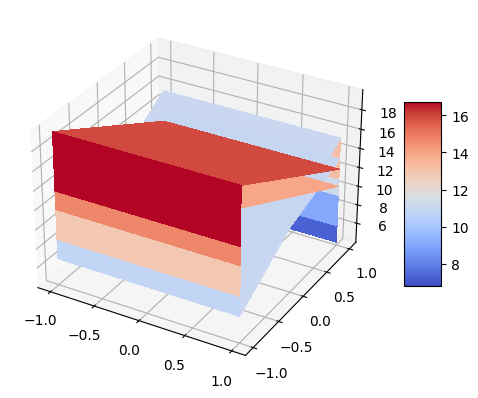

In [149]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
x1=df['b']
x2=df['c']
x1, x2 = np.meshgrid(x1, x2)
surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

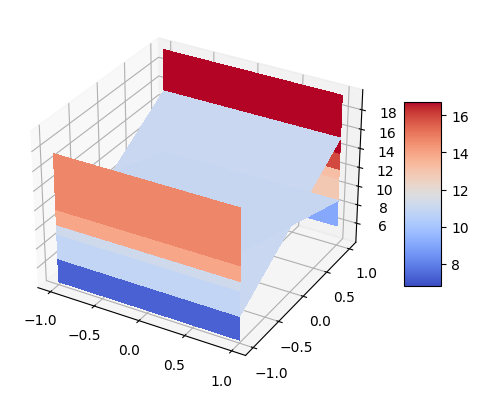

In [150]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
x1=df['b']
x2=df['d']
x1, x2 = np.meshgrid(x1, x2)
surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

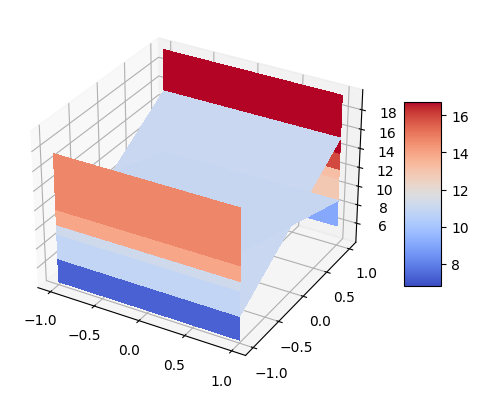

In [151]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
x1=df['c']
x2=df['d']
x1, x2 = np.meshgrid(x1, x2)
surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

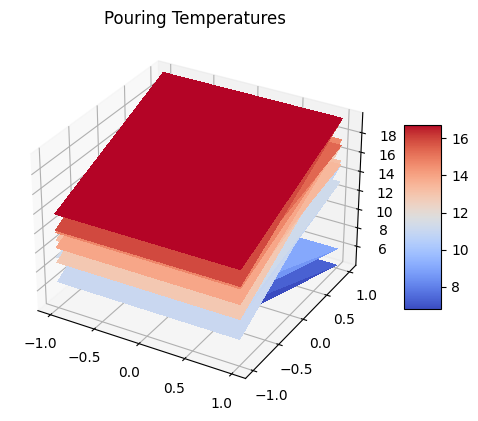

In [152]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
x1=df['a']
x2=df['a']
x1, x2 = np.meshgrid(x1, x2)
surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Pouring Temperatures')
plt.show()

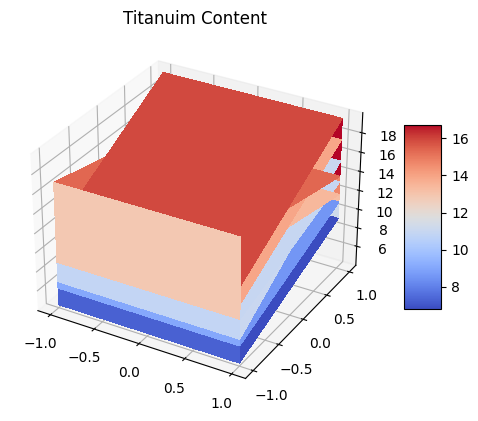

In [153]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
x1=df['b']
x2=df['b']
x1, x2 = np.meshgrid(x1, x2)
surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Titanuim Content')
plt.show()

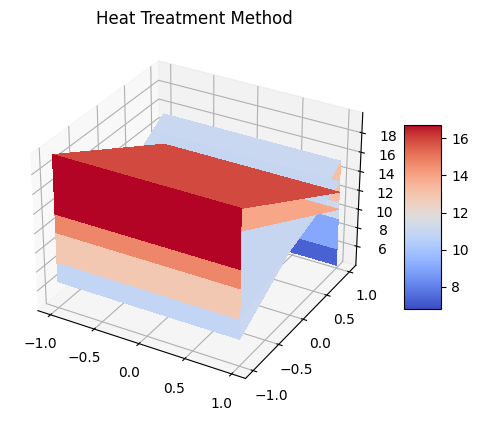

In [154]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
x1=df['c']
x2=df['c']
x1, x2 = np.meshgrid(x1, x2)
surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Heat Treatment Method')
plt.show()

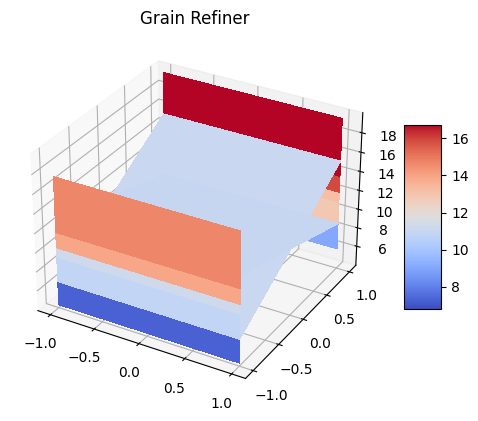

In [155]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
x1=df['d']
x2=df['d']
x1, x2 = np.meshgrid(x1, x2)
surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Grain Refiner')
plt.show()

13.19f Factors a, b, d should all use the lower value and factor c should be high value.

In [156]:
CPlus = table[['I', 'a', 'b', 'c','ab', 'ac', 'bc', 'abc','d','ad','bd','abd','cd','acd','bcd','abcd']][table['c'] == 1]
CPlus['Results'] = df['Results'][df['c'] == 1]
CPlus.tail()

,I,a,b,c,ab,ac,bc,abc,d,ad,bd,abd,cd,acd,bcd,abcd,Results
23,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,12.923
28,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1,12.337
29,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1,5.904
30,1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1,10.935
31,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,15.053


In [178]:
CMinus = table[['I', 'a', 'b', 'c','ab', 'ac', 'bc', 'abc','d','ad','bd','abd','cd','acd','bcd','abcd']][table['c'] == -1]
CMinus['Results'] = df['Results'][df['c'] == -1]
CMinus.tail()

,I,a,b,c,ab,ac,bc,abc,d,ad,bd,abd,cd,acd,bcd,abcd,Results
19,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1,17.815
24,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,-1,8.951
25,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1,17.052
26,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1,13.658
27,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1,19.639


In [158]:
X3=CPlus[['a', 'b', 'c','d','ab', 'ac', 'bc','ad','bd','cd']]
Y3=CPlus[['Results']]
regr=LinearRegression()
regr.fit(X3,Y3)
Yhat3=regr.predict(X3)
Yhat3

array([[10.3330625],
       [ 4.1769375],
       [ 9.2504375],
       [13.2375625],
       [12.0354375],
       [ 6.0705625],
       [11.1185625],
       [15.2969375],
       [10.3330625],
       [ 4.1769375],
       [ 9.2504375],
       [13.2375625],
       [12.0354375],
       [ 6.0705625],
       [11.1185625],
       [15.2969375]])

In [159]:
X4=CMinus[['a', 'b', 'c','d','ab', 'ac', 'bc','ad','bd','cd']]
Y4=CMinus[['Results']]
regr=LinearRegression()
regr.fit(X4,Y4)
Yhat4=regr.predict(X4)
Yhat4

array([[ 6.93261719],
       [16.02636719],
       [11.19042969],
       [17.03417969],
       [ 8.78417969],
       [16.94042969],
       [14.24511719],
       [19.15136719],
       [ 6.93261719],
       [16.02636719],
       [11.19042969],
       [17.03417969],
       [ 8.78417969],
       [16.94042969],
       [14.24511719],
       [19.15136719]])

In [160]:
model3 = sm.OLS(Y3, X3)
res3=model3.fit()
print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:                Results   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     456.7
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           1.17e-10
Time:                        01:33:41   Log-Likelihood:                 3.3624
No. Observations:                  16   AIC:                             7.275
Df Residuals:                       9   BIC:                             12.68
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
a             -0.2472      0.033     -7.564      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [161]:
model4 = sm.OLS(Y4, X4)
res4=model4.fit()
print(res4.summary())

                            OLS Regression Results                            
Dep. Variable:                Results   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     551.6
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           5.01e-11
Time:                        01:33:41   Log-Likelihood:                 1.6558
No. Observations:                  16   AIC:                             10.69
Df Residuals:                       9   BIC:                             16.10
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
a              1.7567      0.036     48.308      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


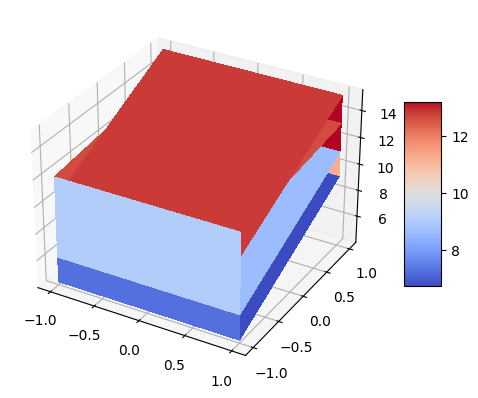

In [162]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
x1=CPlus['a']
x2=CPlus['b']
x1, x2 = np.meshgrid(x1, x2)
surf = ax.plot_surface(x1, x2, Yhat3, cmap=cm.coolwarm,linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

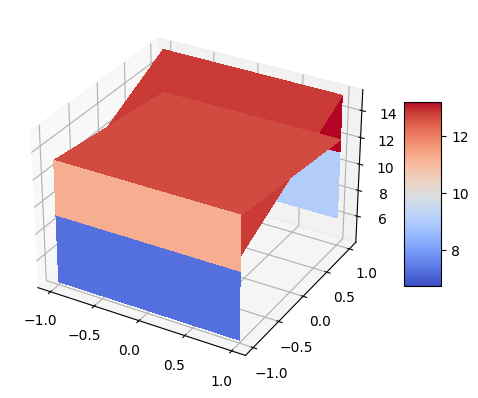

In [163]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
x1=CPlus['a']
x2=CPlus['d']
x1, x2 = np.meshgrid(x1, x2)
surf = ax.plot_surface(x1, x2, Yhat3, cmap=cm.coolwarm,linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

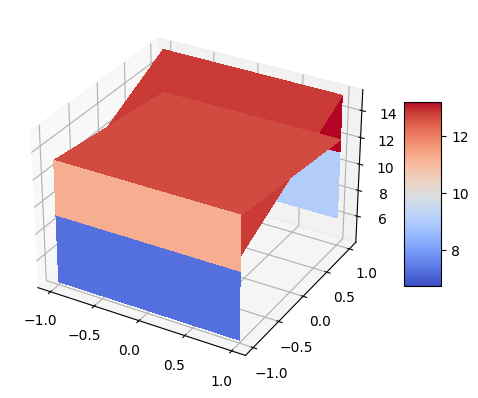

In [164]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
x1=CPlus['b']
x2=CPlus['d']
x1, x2 = np.meshgrid(x1, x2)
surf = ax.plot_surface(x1, x2, Yhat3, cmap=cm.coolwarm,linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

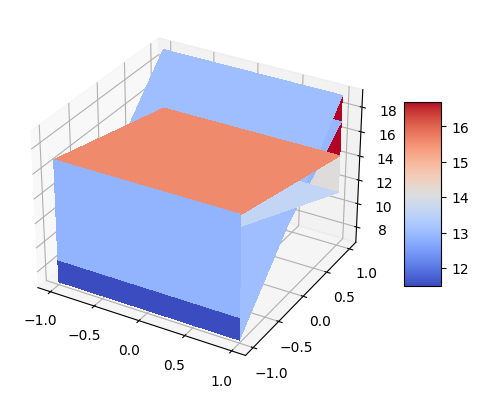

In [180]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
x1=CMinus['a']
x2=CMinus['b']
x1, x2 = np.meshgrid(x1, x2)
surf = ax.plot_surface(x1, x2, Yhat4, cmap=cm.coolwarm,linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

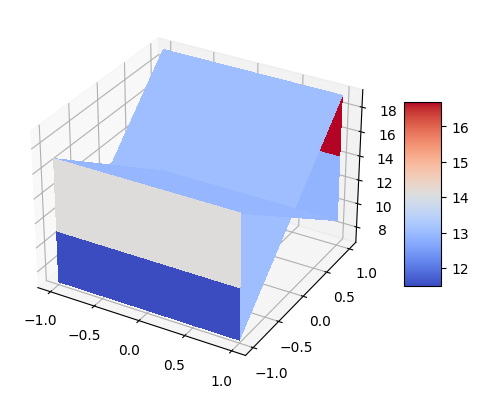

In [181]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
x1=CMinus['a']
x2=CMinus['d']
x1, x2 = np.meshgrid(x1, x2)
surf = ax.plot_surface(x1, x2, Yhat4, cmap=cm.coolwarm,linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

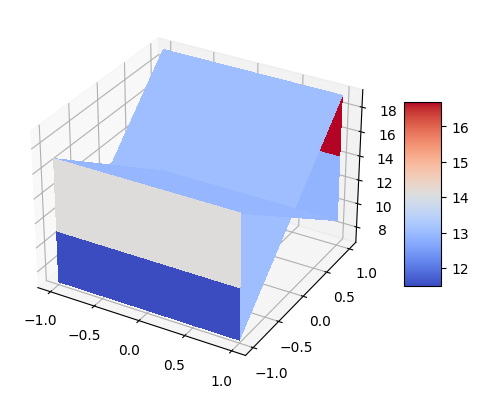

In [182]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
x1=CMinus['b']
x2=CMinus['d']
x1, x2 = np.meshgrid(x1, x2)
surf = ax.plot_surface(x1, x2, Yhat4, cmap=cm.coolwarm,linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

13.20c Setting heat treatment to C+, I would use low levels of the factors temperature, titanium content, and the amount of grain refiner used to decrease the amount of vaiabilty as well as the crack length.

13.20d Setting heat treatment to C-, I would use low levels of temperature and titanium content and a high level of of grain refiner used to decrease the amount of variability as well as crack length.